We will use sklearn module to implement decision tree algorithm . sklearn uses CART (Classification and Regression Trees) algorithm and by default it uses impurity as a criteria to split the nodes.

There are other algorithm ID3,C4.5,Chi-Square etc.

We Will see the use of cart in following implementation.

In [3]:
#Import necessary libraries
import pandas as pd
import numpy as np

#For datavisualiztion 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# For model prepration
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler


In [4]:
#Import the Data

In [21]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [6]:
#See Data Summary

In [22]:
data.shape

(1599, 13)

In [23]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [24]:
#There is no null values we are good to proceed

In [25]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As we hvae categorical column(Alcohol_content) we  need to convert into numeric data using encoding method.



Content is following same like low medium high . we need to give weight according to the order .

In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [35]:
df=OrdinalEncoder(categories=[['Low','Medium','High']])
df1=df.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

Override alcohol content column with codes . Now we are infuse the original data. and convert data transformation we are reassigning the data in the same column.

In [36]:
data['Alcohol_content']=df1

Then we are going to check relationship and multicollinearity problem.

In Machine learning there is not fixed method , there is no standard.



If everything is stardized if everything is pre defined . every company they will atomat everything . if everything is fix company dont need data scientist.

Why Dont need - > Beacuse only human and see tha data and analyse it machine  working based on ours intruction

- Still we are not started to check relationship.

# Plotting Heatmap (Correaltion Matrix)

- Lets try to see . if we can reduce the features using different tehniques.

- Lets plot heatmap to visualize and find the coefficient of multicollinearity.

In [37]:
df_corr=data.corr().abs()# (absolute value)This code will get the coefficient of one varible vs all other variable(Relationship)

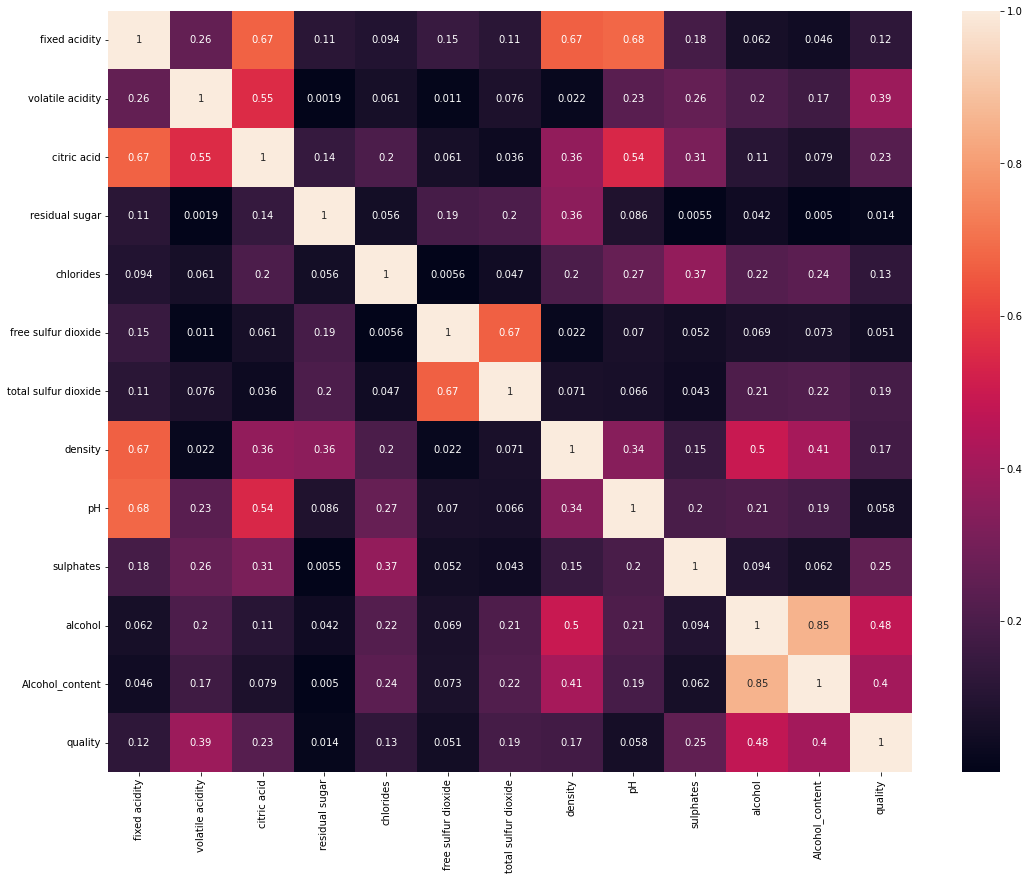

In [40]:
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

Seems like alcohol_content and alcohol are correlated as per above heat map. But we need proof.

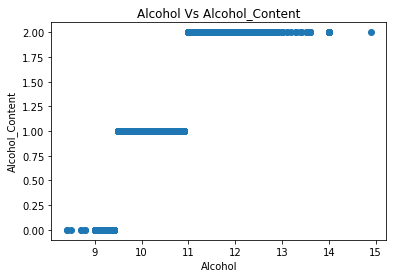

In [41]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_Content')
plt.title('Alcohol Vs Alcohol_Content')
plt.show()

We see clear trend . As and when alcohol level increases its content also increasing . so we can delete one of them.

In [50]:
x=data.drop(columns=['Alcohol_content','quality'])
y=data.quality

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=94255)

Here we are not going to use Standard Scaler because decision tree will take care of that you dont need to standadize the data in the decision tree.

In [52]:
#Write function and call as many times to check accuaracy_score of different models

In [53]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("==================Training Score=================")
        print("Accuracy Score == >  ", accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=cnn.predict(x_test)
        print("=================Test Score======================")
        print("Accuracy Score===>  ",accuracy_score(y_test,pred)*100)
        print("Classification Report==>",classification_report(y_test,pred))


In [55]:
#Intiate DecisionTressClassifier with new parameter and train

cnn=DecisionTreeClassifier()

In [57]:
#Traib the model
cnn.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
#Call the function and pass dataset to check train and test score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   100.0
=================Test Score======================
Accuracy Score===>   60.5
Classification Report==>               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.66      0.73      0.69       166
           6       0.62      0.56      0.59       160
           7       0.52      0.56      0.54        57
           8       0.00      0.00      0.00         5

    accuracy                           0.60       400
   macro avg       0.30      0.31      0.30       400
weighted avg       0.60      0.60      0.60       400



Q- In general which model pretend to overfit.


Ans- Decision Tree . Because this is rule based algorithm . every is going to divided so possibilty is there overrfit problem.



Q - You say decision tree is a good model, one of the best model so where is the use of that.


Ans- So, we will apply some techniques to overcome this but that will take some time . they will take some cost . without hyperparameter tuning it will pretend to overfitting.


"Now we did not tune any parameter and we got 100%"

# Lets Understand the above tree:

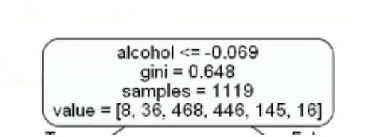

- The first value indicates the column and the condition on which the root rode was selected and further will be splitted.


- The second value gives the ginni impurity of the selected node


- Samples gives the numbers of observation at that point present in the node.



- Value with the square brackets represent number of observation present in each class (output) i.e in the above give figure,8 observation are in class 1-38 , in class2-468 snd so on.



- Then the split was made on the basis of given condtion

Root Node -  Alcohol feature is the top feature that contributes more to the label and we have seen this in heat map..



Q- What basis we decided alcohol is best feature .

Ans - Gini Indexing



Q- What is sample ?

Ans - Samples is when it is dividing yes or No based on some condition . so that time we have 1119  Samples.

Sample is nothing but number of rows , number of observation all are same here . we called samples.



Q- What are Values ?

Ans- Out of these sample 1119, so 7 samples are associated and  b sample are classified as quality number 3.

Values - 8,36,468,446,145,16


Quality - 3,4,5,6,7,8

Q - How it is dividing 


Ans- what is does alcohol take some numbers. and let say average .it has to divide this into True and False so it. will pick this number <=-0.069. so this will picked based on ginni.

if alcohol level <=10.25 go  True side if this condition is False go False side. is this how journey will start.



So out of this 1119 samples of the True and Some will False.



Then the next feature or second highest feature is sulfur dioxide <=98.5. what wa the ginni indexing number -0.511 it will give all this information and samples =641


Values - 5,23,408,183,20,2
Quality - 3,4,5,6,7,8




So it will keep on dividing unit last leaf node. leaf node is anywhere it does not need all the way down only.





Q - Lets Understand leaf node ?

Ans - Same thing it will keep dividing so here you can see sample 4.

Only one sample belongs to quality

 Values = [0,0,1,3,0,0]
 
 Quality = [0,0,5,6,0,0]  it will go until that point so these are all leaf.
 
 
 
 Q - Why we are calling leaf node - > Where Decision are being made,

# Model Confidence / Accuracy


Lets now try to tune some parameters using the GridSearchCV algorithm.


GridSearchCV is a method used to tune our hyperparameter we can pass different values  of hyperparameter as parameter for grid search it does a exhaustive generation of combination of different  parameters  passed . using cross validation score , GridSearch returms the combination of hyperparameter for which the model is perfprminng the best.

Q- What are hyper paramters ?


DecisionTreeClassifier(class_weight=None,
                      
                      
                      
                      Criterion='gini,
                       max_depth=None,
                       Max_feature=None,Max_leaf_nodes=None,
                       min_impurity_decreases=0.0, presort=False,
                       random_state=None,splitter='best)
                       
                       

We can see above the decision tree classifier algorithms takes all those parameters which are also know as hyperparameter.


Let see the most importance ones of the parameter (as per sklearn documentation)

In [98]:
#We are tuning four important hyperparameter right now, we are passing the different values for both paramters.


grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes

#criterian

In [103]:
grid_search=GridSearchCV(estimator=cnn,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)#use all the cores in your system for performance improvement .


In [104]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [106]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [107]:
#Initiate DecisionTreeClassifier with new parameter and train.

cnn=DecisionTreeClassifier(criterion='entropy',max_depth=10,max_leaf_nodes=9,min_samples_split= 3)

In [108]:
#Train the model
cnn.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=9,
                       min_samples_split=3)

In [109]:
#Call the function and pass dataset to check train and test score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   60.80066722268557
=================Test Score======================
Accuracy Score===>   56.99999999999999
Classification Report==>               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.69      0.65      0.67       166
           6       0.52      0.62      0.56       160
           7       0.49      0.37      0.42        57
           8       0.00      0.00      0.00         5

    accuracy                           0.57       400
   macro avg       0.28      0.27      0.28       400
weighted avg       0.56      0.57      0.56       400



In [ ]:
#Student of DataScience
#Student of DataTrained - Saurav
#Date - 13-09-2022
#Time- 21:11